<a href="https://colab.research.google.com/github/iamartinezg/Modelo-Red-Neuronal/blob/main/Modelo_red_neuronal_para_arreglo_PV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Red Neuronal para un Arreglo PV
#*Ivan Aleajandro Martinez Gracia*

Los datos entregados por el modelo ```Sunset.slx``` corresponden a 961 archivos iterados de la siguiente manera: 31 temperaturas ```T=[15-45]``` con un $\Delta$ T = 1. Y 31 irradiancias ```G=[400-1000]``` con un $\Delta$ G = 20.

Cada archivo esta nombrado de la siguiente manera: ```Outputpv_T{T}_G{G}.txt``` que contienen los calculos obtenidos por simulink: La variacion de la corriente con respecto a la tension para una temperatura e irradiancia determinada.

La tension varia de 0 a 200 V con un $\Delta$ V = 1.

In [ ]:
# Importar librerias
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Cargar los datos desde repositorio
!git clone https://github.com/cristhiamdaniel/PV-System.git

Cloning into 'PV-System'...
remote: Enumerating objects: 967, done.
remote: Counting objects: 100% (967/967), done.
remote: Compressing objects: 100% (966/966), done.
remote: Total 967 (delta 0), reused 964 (delta 0), pack-reused 0
Receiving objects: 100% (967/967), 855.60 KiB | 2.84 MiB/s, done.


## Procesamiento de Datos

### Data Potencia Maxima

In [ ]:
# Creacion de un dataframe general con la maxima potencia para cada T y G

path = '/content/PV-System/Data_PV/'

# Iteramos en los archivos para extraer la maxima potencia
pot_max = []
irra = []
temp = []
for t in range(15,45+1):
  for g in range(400,1000+1,20):
    filename = f'OutputPV_T{t}_G{g}.txt'
    df = pd.read_csv(path + filename, header=None)
    encabezado = ["V", "I"]
    df.columns = encabezado
    df['P'] = df['V'] * df['I']
    pmm = df['P'].max()
    pot_max.append(pmm)
    irra.append(g)
    temp.append(t)

# Creacion del DF

dataframe_pot = pd.DataFrame()
dataframe_pot['T'] = temp
dataframe_pot['G'] = irra
dataframe_pot['Pmax'] = pot_max
dataframe_pot

,T,G,Pmax
0,15,400,1582.992
1,15,420,1666.400
2,15,440,1749.760
3,15,460,1832.985
4,15,480,1916.222
...,...,...,...
956,45,920,3225.292
957,45,940,3294.253
958,45,960,3363.087
959,45,980,3431.794


In [ ]:
dataframe_pot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       961 non-null    int64  
 1   G       961 non-null    int64  
 2   Pmax    961 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 22.6 KB


In [ ]:
# Guardar el archivo local
dataframe_pot.to_csv('Data_pot.csv')

### Data Potencia: Entrenamiento - Validacion 

In [ ]:
train_1, test_1 = train_test_split(dataframe_pot, test_size = 0.30)
train_1.to_csv('train_pot.csv')
test_1.to_csv('test_pot.csv')

## MODELO 1 - Potencia Max

### RNA 1

Vamos a predecir la ```potencia maxima``` teniendo como entrada la ```temperatura``` y la ```irradiancia```.

In [ ]:
g = train_1['G']
t = train_1['T']

entrada = np.array(np.column_stack((g,t)), dtype='float')

p = train_1['Pmax']
salida = np.array(np.transpose(p), dtype='float')

In [ ]:
oculta1 = tf.keras.layers.Dense(units=10, input_shape=[2])
oculta2 = tf.keras.layers.Dense(units=10)
output = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1,  oculta2, output])

In [ ]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

In [ ]:
print("Comenzando entrettnamiento ... ")
historial = modelo.fit(entrada,salida, epochs=100, verbose=False)
print("Modelo entranado!")

Comenzando entrettnamiento ... 
Modelo entranado!


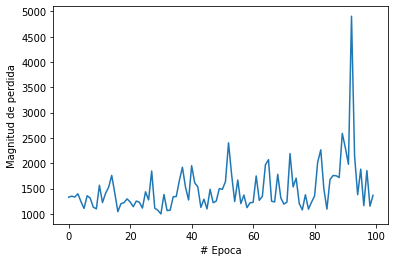

In [ ]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

### RNA 2

Comenzando entrenamiento ... 
Modelo entranado!


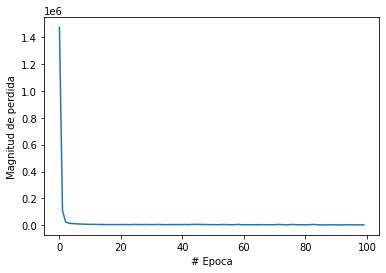

In [ ]:
g = train_1['G']
t = train_1['T']

entrada = np.array(np.column_stack((g,t)), dtype='float')

p = train_1['Pmax']

##############################################################

salida = np.array(np.transpose(p), dtype='float')
oculta1 = tf.keras.layers.Dense(units=5, input_shape=[2])
oculta2 = tf.keras.layers.Dense(units=2)
output = tf.keras.layers.Dense(units=1)

###############################################################
modelo = tf.keras.Sequential([oculta1,  oculta2, output])
###############################################################

modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)
###############################################################

print("Comenzando entrenamiento ... ")
historial = modelo.fit(entrada,salida, epochs=100, verbose=False)
print("Modelo entranado!")
###############################################################
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [ ]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(output.get_weights())

Variables internas del modelo
[array([[ 0.67033446, -0.2966106 , -0.01998537, -0.38660145,  1.0487925 ],
       [-1.075884  , -0.20943986, -3.1135402 ,  0.02758573, -1.84972   ]],
      dtype=float32), array([ 18.468002 ,   1.2586317,  27.301346 , -10.97803  ,  20.440323 ],
      dtype=float32)]
[array([[-0.17117049, -1.2795218 ],
       [-0.31654954, -0.09632481],
       [-0.6963905 , -0.80916595],
       [ 0.03652098,  0.593637  ],
       [-0.32155666, -1.7501591 ]], dtype=float32), array([ -2.9189575, -16.129646 ], dtype=float32)]
[array([[-0.08504742],
       [-1.3637999 ]], dtype=float32), array([15.210299], dtype=float32)]


In [ ]:
# Modelo
w1 = np.array([[ 0.67033446, -0.2966106 , -0.01998537, -0.38660145,  1.0487925 ],
       [-1.075884  , -0.20943986, -3.1135402 ,  0.02758573, -1.84972   ]],
      dtype='float')
b1 = np.array([ 18.468002 ,   1.2586317,  27.301346 , -10.97803  ,  20.440323 ],
      dtype='float')
w2 = np.array([[-0.17117049, -1.2795218 ],
       [-0.31654954, -0.09632481],
       [-0.6963905 , -0.80916595],
       [ 0.03652098,  0.593637  ],
       [-0.32155666, -1.7501591 ]], dtype='float')
b2 = np.array([ -2.9189575, -16.129646 ], dtype='float')
w3 = np.array([[-0.08504742],
       [-1.3637999 ]], dtype='float')
b3 = np.array([15.210299], dtype='float')

In [ ]:
test_1.head()

,T,G,Pmax
901,44,440,1529.080
710,37,960,3521.040
439,29,500,1890.510
800,40,900,3249.988
869,43,420,1464.832


In [ ]:
test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 901 to 521
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       289 non-null    int64  
 1   G       289 non-null    int64  
 2   Pmax    289 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 9.0 KB


In [ ]:
# VALIDACION 

pot_pred = []  # Prediccion de Potencias maximas 
errorAb = [] # Error absoluto de cada prediccion

for i in range(289):
  G = test_1.iloc[i]['G']
  T = test_1.iloc[i]['T']
  entrada = np.array([[G,T]], dtype='float')
  x1 = entrada.dot(w1) + b1
  x2 = x1.dot(w2) + b2
  x3 = x2.dot(w3) + b3
  pot_pred.append(float(x3))

for i in range(289):
  error = 100*(abs(test_1.iloc[i]['Pmax'] - pot_pred[i])/test_1.iloc[i]['Pmax'])
  errorAb.append(error)

test_1["Pot Pred"] = pot_pred
test_1["Error %"] = errorAb

test_1

,T,G,Pmax,Pot Pred,Error %
901,44,440,1529.080,1459.069590,4.578597
710,37,960,3521.040,3586.179800,1.850016
439,29,500,1890.510,1846.919587,2.305749
800,40,900,3249.988,3318.745065,2.115610
869,43,420,1464.832,1389.993889,5.108989
...,...,...,...,...,...
402,27,1000,3850.518,3844.746465,0.149890
344,26,460,1756.464,1718.802789,2.144149
211,21,900,3559.265,3509.402562,1.400920
659,36,560,2054.589,2014.008271,1.975126


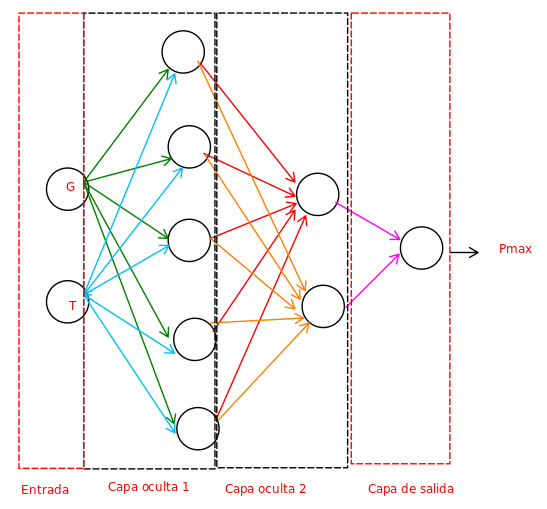

(array([50., 59., 95., 41., 15., 13., 11.,  2.,  1.,  2.]),
 array([6.04573753e-05, 6.09991618e-01, 1.21992278e+00, 1.82985394e+00,
        2.43978510e+00, 3.04971626e+00, 3.65964742e+00, 4.26957858e+00,
        4.87950974e+00, 5.48944090e+00, 6.09937206e+00]),
 <a list of 10 Patch objects>)

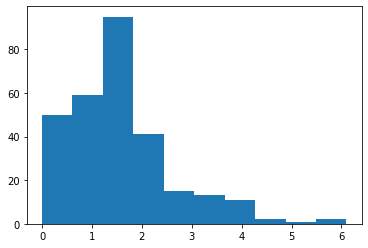

In [ ]:
# Graficamos el error
plt.hist(test_1['Error %'])

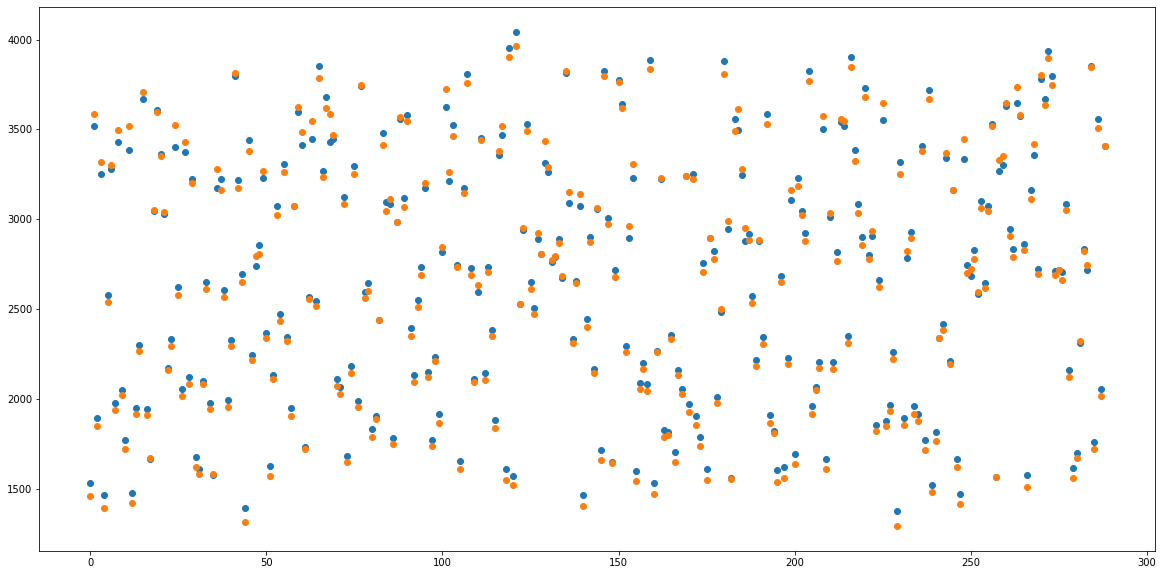

In [ ]:
x = []
for i in range(289):
  x.append(i)

plt.figure(figsize=(20,10))
plt.scatter(x,test_1['Pmax'])
plt.scatter(x,test_1['Pot Pred'])

## Modelo 1

,V,I,P,T,G
0,0,10.768,0.000,15,400
1,1,10.766,10.766,15,400
2,2,10.765,21.530,15,400
3,3,10.763,32.289,15,400
4,4,10.761,43.044,15,400
...,...,...,...,...,...
196,196,-39.222,-7687.512,45,1000
197,197,-40.722,-8022.234,45,1000
198,198,-42.229,-8361.342,45,1000
199,199,-43.742,-8704.658,45,1000


Se entrena una red neuronal Densa, la cual recibe como entrada la ```Irradiancia```, la ```Temperatura``` y la ```Tension``` para predecir la ```Corriente```. Se utiliza 3 capas ocultas y 1 capa de salida. Las tres capas ocultas tienen 10 neuronas cada una, y la capa de salida 1 sola neurona. Despues de 2 horas y media de entrenamiento con 1000 epocas se obtuvo el siguiente resultado:

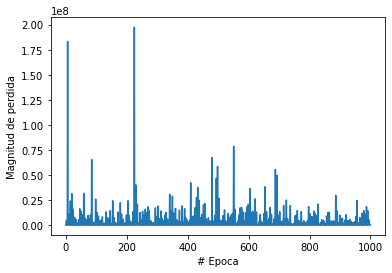

Los resultados no son los mejores ya que existen errores de prediccion muy grandes como podemos ver en el siguiente grafico. 

Ahora se tomaran solamente los valores de corrientes positivas para una segunda prueba.

In [ ]:
# Filtrar las filas cuyos valores de corriente es negativo
filtro = DF['I'] > 0
DF2 = DF[filtro]
DF2

,V,I,P,T,G
0,0,10.768000,0.000000,15,400
1,1,10.766000,10.766000,15,400
2,2,10.765000,21.530000,15,400
3,3,10.763000,32.289000,15,400
4,4,10.761000,43.044000,15,400
...,...,...,...,...,...
163,163,4.506000,734.478000,45,1000
164,164,3.412500,559.650000,45,1000
165,165,2.299500,379.417500,45,1000
166,166,1.167600,193.821600,45,1000


El dataframe general se guarda en un archivo csv de manera local:

```python
DF.to_csv('DataGeneral.csv')
```

Se generan dos dataframes a partir del general: 
* Un dataframe para entrenamiento que consiste en el 70% de los datos totales.
* Un dataframe para valdiacion que corresponde al 30% de los datos totales.

```python
train, test = train_test_split(DF, test_size = 0.30)
```

Ambas datas se guardan de manera local:

```python
train.to_csv("data_entrenamiento.csv")
test.to_csv("data_validacion.csv")
```

Se tiene una red con 3 capas ocultas, la primera tiene 10 neuronas, la segunda 5 neuronas y la tercera 2 neuronas.

In [ ]:
DF2.to_csv('DataFiltro.csv')
train, test = train_test_split(DF2, test_size = 0.30)
train.to_csv("data_entrenamiento_filtro.csv")
test.to_csv("data_validacion_filtro.csv")

In [ ]:
g = train['G']
t = train['T']
v = train['V']
entrada = np.array(np.column_stack((g,t,v)), dtype='float')

i = train['I']
salida = np.array(np.transpose(i), dtype='float')

In [ ]:
oculta1 = tf.keras.layers.Dense(units=10, input_shape=[3])
oculta2 = tf.keras.layers.Dense(units=5)
oculta3 = tf.keras.layers.Dense(units=2)
modelo = tf.keras.Sequential([oculta1,  oculta2, oculta3])

In [ ]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

In [ ]:
print("Comenzando entrettnamiento ... ")
historial = modelo.fit(entrada,salida, epochs=500, verbose=False)
print("Modelo entranado!")

Comenzando entrenamiento ... 
Modelo entranado!


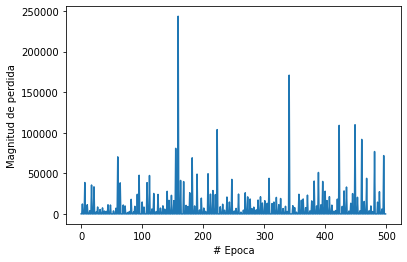

In [ ]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

Los resultados siguen siendo los no esperados